In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport

In [2]:
# Leitura dos dados
dt_test = pd.read_csv('churn-bigml-20.csv')
dt_train = pd.read_csv('churn-bigml-80.csv')

In [3]:
# Gerando report
df = pd.concat([dt_test, dt_train], ignore_index=True, sort=False)
profile = ProfileReport(df, title='Info telecom', explorative=True)

profile.to_widgets()

In [4]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


<AxesSubplot:xlabel='State'>

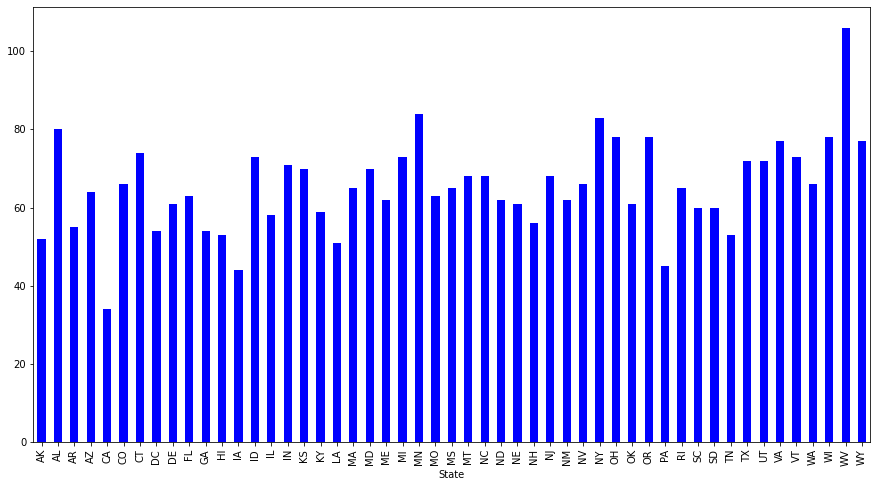

In [5]:
agrupamento_estado = df.groupby(["State"])["Churn"].count()
agrupamento_estado.plot.bar(color = "blue", figsize=(15,8))

In [6]:
df_origin = df.copy()
df[df['State'].unique()] = 0
df[df['Area code'].unique()] = 0

df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,WV,PA,ND,AR,TN,IA,GA,408,415,510
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,0,0,0,0,0,0,0,0,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,0,0,0,0,0,0,0,0,0,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,0,0,0,0,0,0,0,0,0,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,0,0,0,0,0,0,0,0,0,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
states = df['State'].unique()
area_codes = df['Area code'].unique()

def set_area_code(row, area_code):
    if row['Area code'] == area_code:
        return 1
    return 0

def set_state(row, state):
    if row['State'] == state:
        return 1
    return 0

for area_code in area_codes:
    df[area_code] = df.apply(lambda x : set_area_code(x, area_code), axis=1)

for state in states:
    df[state] = df.apply(lambda x : set_state(x, state), axis=1)
    
df.head(5) 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,WV,PA,ND,AR,TN,IA,GA,408,415,510
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,0,0,0,0,0,0,0,1,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,0,0,0,0,0,0,0,0,1,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,0,0,0,0,0,0,0,0,1,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,0,0,0,0,0,0,0,0,1,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df.groupby('WV').count()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,MD,PA,ND,AR,TN,IA,GA,408,415,510
WV,,,,,,,,,,,,,,,,,,,,,
0,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227,...,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227
1,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106


In [9]:
# Transformando dados categoricos em numericos
df['Churn'] = df['Churn'].replace('True', 1).replace('False', 0).astype('int')
df['International plan'] = df['International plan'].replace('Yes', 1).replace('No', 0).astype('int')
df['Voice mail plan'] = df['Voice mail plan'].replace('Yes', 1).replace('No', 0).astype('int')

df.drop('State', inplace=True, axis=1)
df.drop('Area code', inplace=True, axis=1)

df.head(5)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,WV,PA,ND,AR,TN,IA,GA,408,415,510
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,0,0,0,0,0,0,0,1,0,0
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,...,0,0,0,0,0,0,0,0,1,0
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,...,0,0,0,0,0,0,0,0,1,0
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,...,0,0,0,0,0,0,0,0,1,0
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,...,0,0,0,0,0,0,0,0,0,1


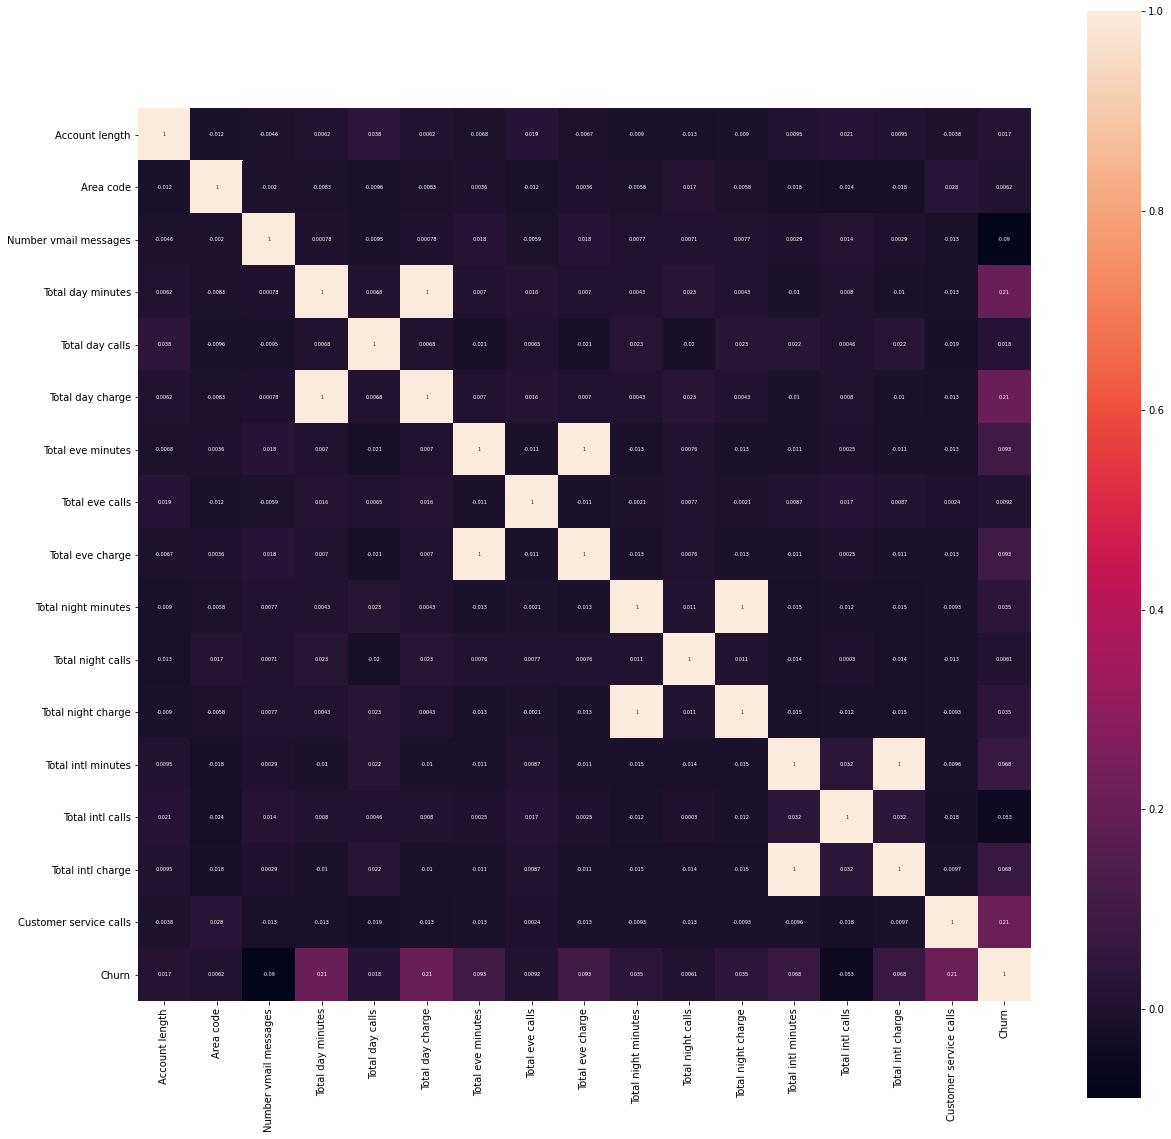

In [10]:
# Mapa de calor para escolher as colunas
corr = df_origin.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot_kws={'size':5}, square=True, annot=True)

plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

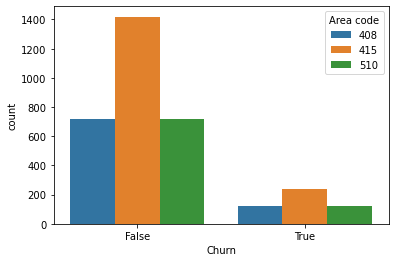

In [11]:
sns.countplot(x='Churn', hue='Area code', data=df_origin)

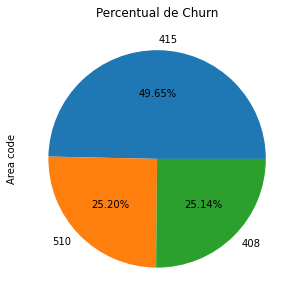

In [12]:
plt.figure(figsize=(5,5))
plt.title('Percentual de Churn')

df_origin['Area code'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

<AxesSubplot:ylabel='Churn'>

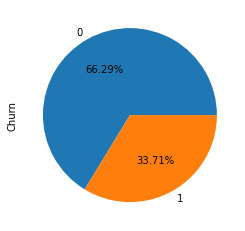

In [13]:
# Criando escala
sc = MinMaxScaler(feature_range=(0, 1))
colunas = df.columns.tolist()

df_balanced = pd.concat([df,df.loc[(df['Churn'] == 1)], df.loc[(df['Churn'] == 1)]], ignore_index=True, sort=False)
df_scaled = df_balanced.copy()
df_scaled[colunas] = sc.fit_transform(df_balanced[colunas])

df_balanced['Churn'].value_counts().plot.pie(autopct='%1.2f%%')

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

def remove_churn(cols):
    new_cols = list()
    for col in cols:
        if col != 'Churn':
            new_cols.append(col)
    return new_cols

colunas_x = remove_churn(colunas)
X = df_scaled[colunas_x]
Y = df_scaled['Churn']

X.head(5)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,WV,PA,ND,AR,TN,IA,GA,408,415,510
0,0.479339,0.0,0.0,0.0,0.525941,0.587879,0.525989,0.966731,0.470588,0.967001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.264463,0.0,0.0,0.0,0.368016,0.830303,0.368042,0.628265,0.488235,0.628276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.661157,0.0,0.0,0.0,0.948974,0.406061,0.948860,0.873797,0.570588,0.873827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.454545,0.0,0.0,0.0,0.314709,0.624242,0.314722,0.377509,0.600000,0.377548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.198347,0.0,0.0,0.0,0.340080,0.709091,0.340040,0.591422,0.641176,0.591394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
kf = KFold(n_splits=10,shuffle=True, random_state=123)

# logreg = LogisticRegression(max_iter=1000, solver='liblinear', verbose=1)
logreg = LogisticRegression(max_iter=200)
cv_scores = cross_val_score(logreg, X_train, Y_train, cv=kf,  scoring='accuracy')

print(cv_scores.mean())

0.779158894679153


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9
)
Optimizer = optimizers.Adam(learning_rate=lr_schedule) 
weights = Optimizer.get_weights()

def create_model(opt):
    model = Sequential()
    model.add(Dense(36, input_dim=71, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

seed = 5

model = create_model(Optimizer)
history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2)

pred_test = model.predict(X_test)

Epoch 1/40
81/81 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.6964 - val_loss: 0.5617 - val_accuracy: 0.7132
Epoch 2/40
81/81 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7425 - val_loss: 0.5201 - val_accuracy: 0.7364
Epoch 3/40
81/81 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7693 - val_loss: 0.5102 - val_accuracy: 0.7566
Epoch 4/40
81/81 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7809 - val_loss: 0.5032 - val_accuracy: 0.7535
Epoch 5/40
81/81 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7767 - val_loss: 0.4956 - val_accuracy: 0.7550
Epoch 6/40
81/81 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7840 - val_loss: 0.4916 - val_accuracy: 0.7535
Epoch 7/40
81/81 [==============================] - 0s 933us/step - loss: 0.4662 - accuracy: 0.7801 - val_loss: 0.4932 - val_accuracy: 0.7442
Epoch 8/40
81/81 [

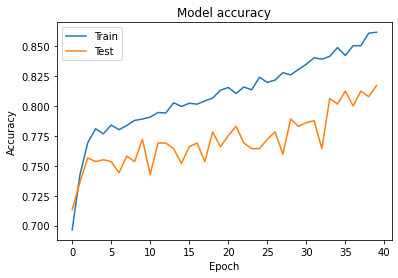

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

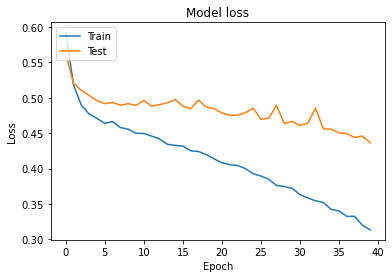

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
adam = optimizers.Adam(learning_rate=0.1)
weights = adam.get_weights()

In [20]:
adam.set_weights(weights)
model = create_model(adam)
history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2, verbose=0)
pred_test = model.predict(X_test)

def plot_accuracy(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

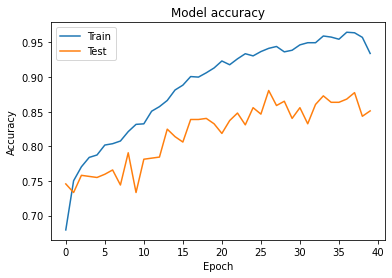

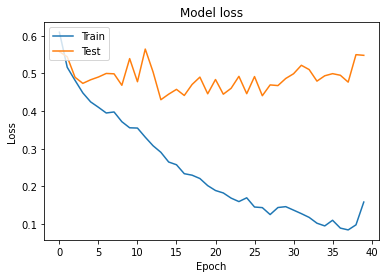

In [21]:
plot_accuracy(history)
plot_loss(history)

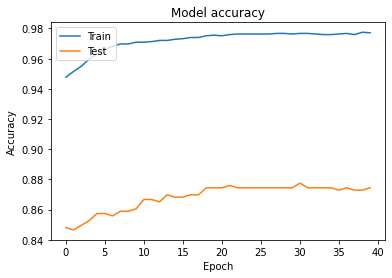

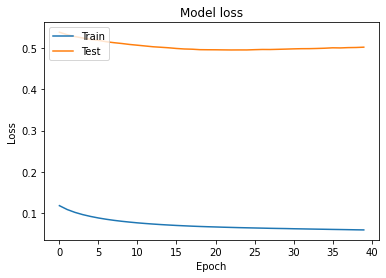

In [22]:
from tensorflow.keras import backend as k

k.set_value(model.optimizer.learning_rate, 0.001)
history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2, verbose=0)
pred_test = model.predict(X_test)

plot_accuracy(history)
plot_loss(history)

In [35]:
# Dropando colunas com um alto nivel de correlação
colunas_x = [i for i in colunas_x if i not in ['Total eve charge','Total night charge','Total intl charge','Total day charge'] ]

X = df_scaled[colunas_x]
Y = df_scaled['Churn']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

def create_model(opt):
    model = Sequential()
    model.add(Dense(36, input_dim=len(colunas_x), activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

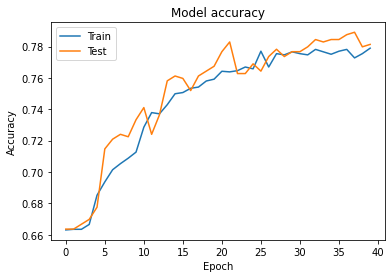

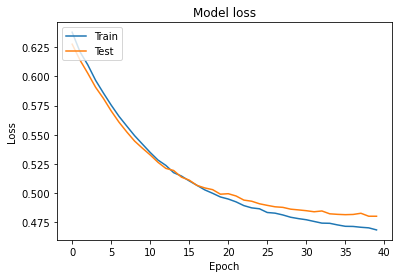

In [41]:
from sklearn.metrics import precision_recall_curve
adam = optimizers.Adam(learning_rate=0.001)
adam.set_weights(weights)
model = create_model(adam)

history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2, verbose=0)
pred_test = model.predict(X_test)

plot_accuracy(history)
plot_loss(history)

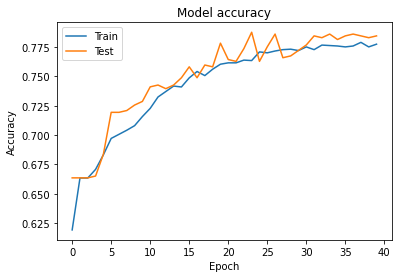

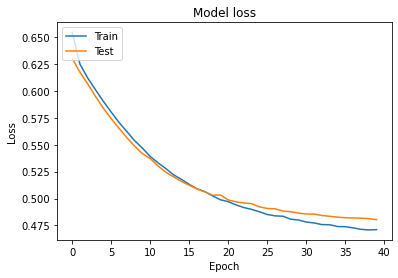

In [45]:
adam = optimizers.Adam()
adam.set_weights(weights)
model = create_model(adam)

history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2, verbose=0)
pred_test = model.predict(X_test)

plot_accuracy(history)
plot_loss(history)

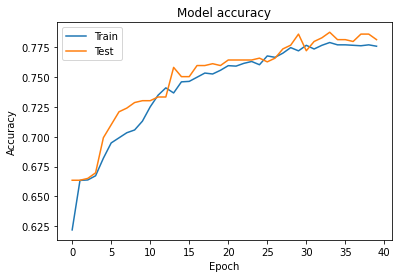

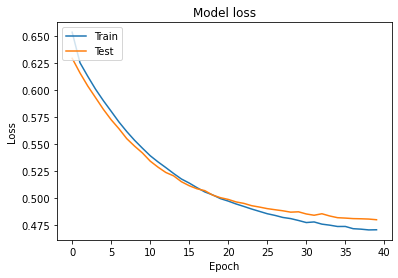

In [46]:
def create_model(opt):
    model = Sequential()
    model.add(Dense(round(len(colunas_x) / 2), input_dim=len(colunas_x), activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

adam = optimizers.Adam()
adam.set_weights(weights)
model = create_model(adam)

history = model.fit(X_train, Y_train, epochs=40, validation_split=0.2, verbose=0)
pred_test = model.predict(X_test)

plot_accuracy(history)
plot_loss(history)

Confusion matrix, without normalization
[[711   0]
 [364   0]]


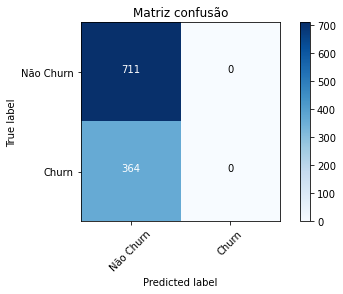

In [50]:
from sklearn.metrics import confusion_matrix
import itertools

rounded_pred = np.argmax(pred_test, axis=1)
cm = confusion_matrix(y_true=Y_test, y_pred=rounded_pred)

def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz confusão', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['Não Churn','Churn']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Matriz confusão')